Regression model - BREAST CANCER dataset

Import libraries

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeaveOneOut, GridSearchCV
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, mean_squared_error, root_mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression, LassoCV



Načtení zdrojového souboru

In [60]:
df = pd.read_csv("breast_cancer.csv")

Dataframe information / Descriptive statistics

In [61]:
df.info()
describe_df = df.describe()
print(describe_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    object
dtypes: int64(9), object(2)
memory usage: 60.2+ KB
       Sample code number  Clump Thickness  Uniformity of Cell Size  \
count        6.990000e+02       

Use ydata_profiling for Exploratory Data Analysis, generating html report with data profile and histograms (html reports in GitHub folder "FINAL")

Cleaning data - replacing incorrect values ("?") with mean values according result Class, dropping duplicate rows

In [62]:

# Convert the column to numeric, forcing non-numeric values to NaN
df["Bare Nuclei"] = pd.to_numeric(df["Bare Nuclei"], errors="coerce")

# Calculate the mean in Class, ignoring NaN values
class_mean_value = df[["Class", "Bare Nuclei"]].groupby("Class").mean()

# Replace NaN values (originally "?") with the Class mean value
df["Bare Nuclei"] = df.apply(lambda row: class_mean_value.loc[row["Class"]].iloc[0] if pd.isna(row["Bare Nuclei"]) else row["Bare Nuclei"], axis=1)

# Convert values to numeric and round, then convert to integer
df["Bare Nuclei"] = df["Bare Nuclei"].round().astype(float).apply(lambda x: int(x) if not pd.isna(x) else np.nan)

# Remove duplicates when whole row is the same included Sample number, reindex DataFrame
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

# Remove first column with Sample number, as it is no longer needed
df = df.drop(df.columns[0], axis=1)

In [63]:
# Save the DataFrame to a new CSV file in overwrite mode
df.to_csv("breast_cancer_upd.csv", index=False, mode="w")

# Print the updated DataFrame
print(df)

     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
685                3                        1                         1   
686                2                        1                         1   
687                5                       10                        10   
688                4                        8                         6   
689                4                        8                         8   

     Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                    1         

Load updated file, without NaN and duplications

In [64]:
df = pd.read_csv("breast_cancer_upd.csv", usecols=["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size",
                                                   "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses"])

Creating additional visualizations to familiarize with data

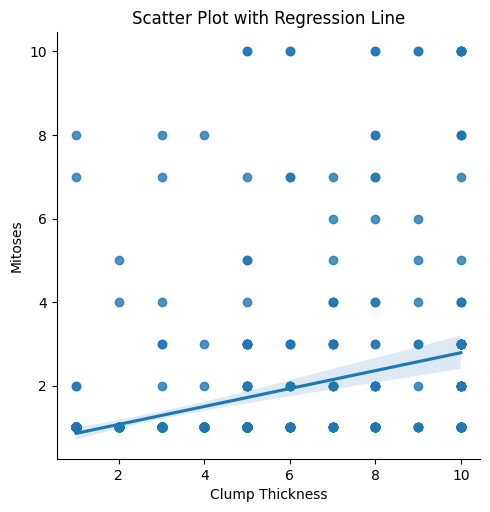

In [65]:
# 1. SCATTER PLOT WITH REGRESSION LINE (every pair of variables can be checked)
sns.lmplot(x="Clump Thickness", y="Mitoses", data=df)
plt.title("Scatter Plot with Regression Line")
plt.show()

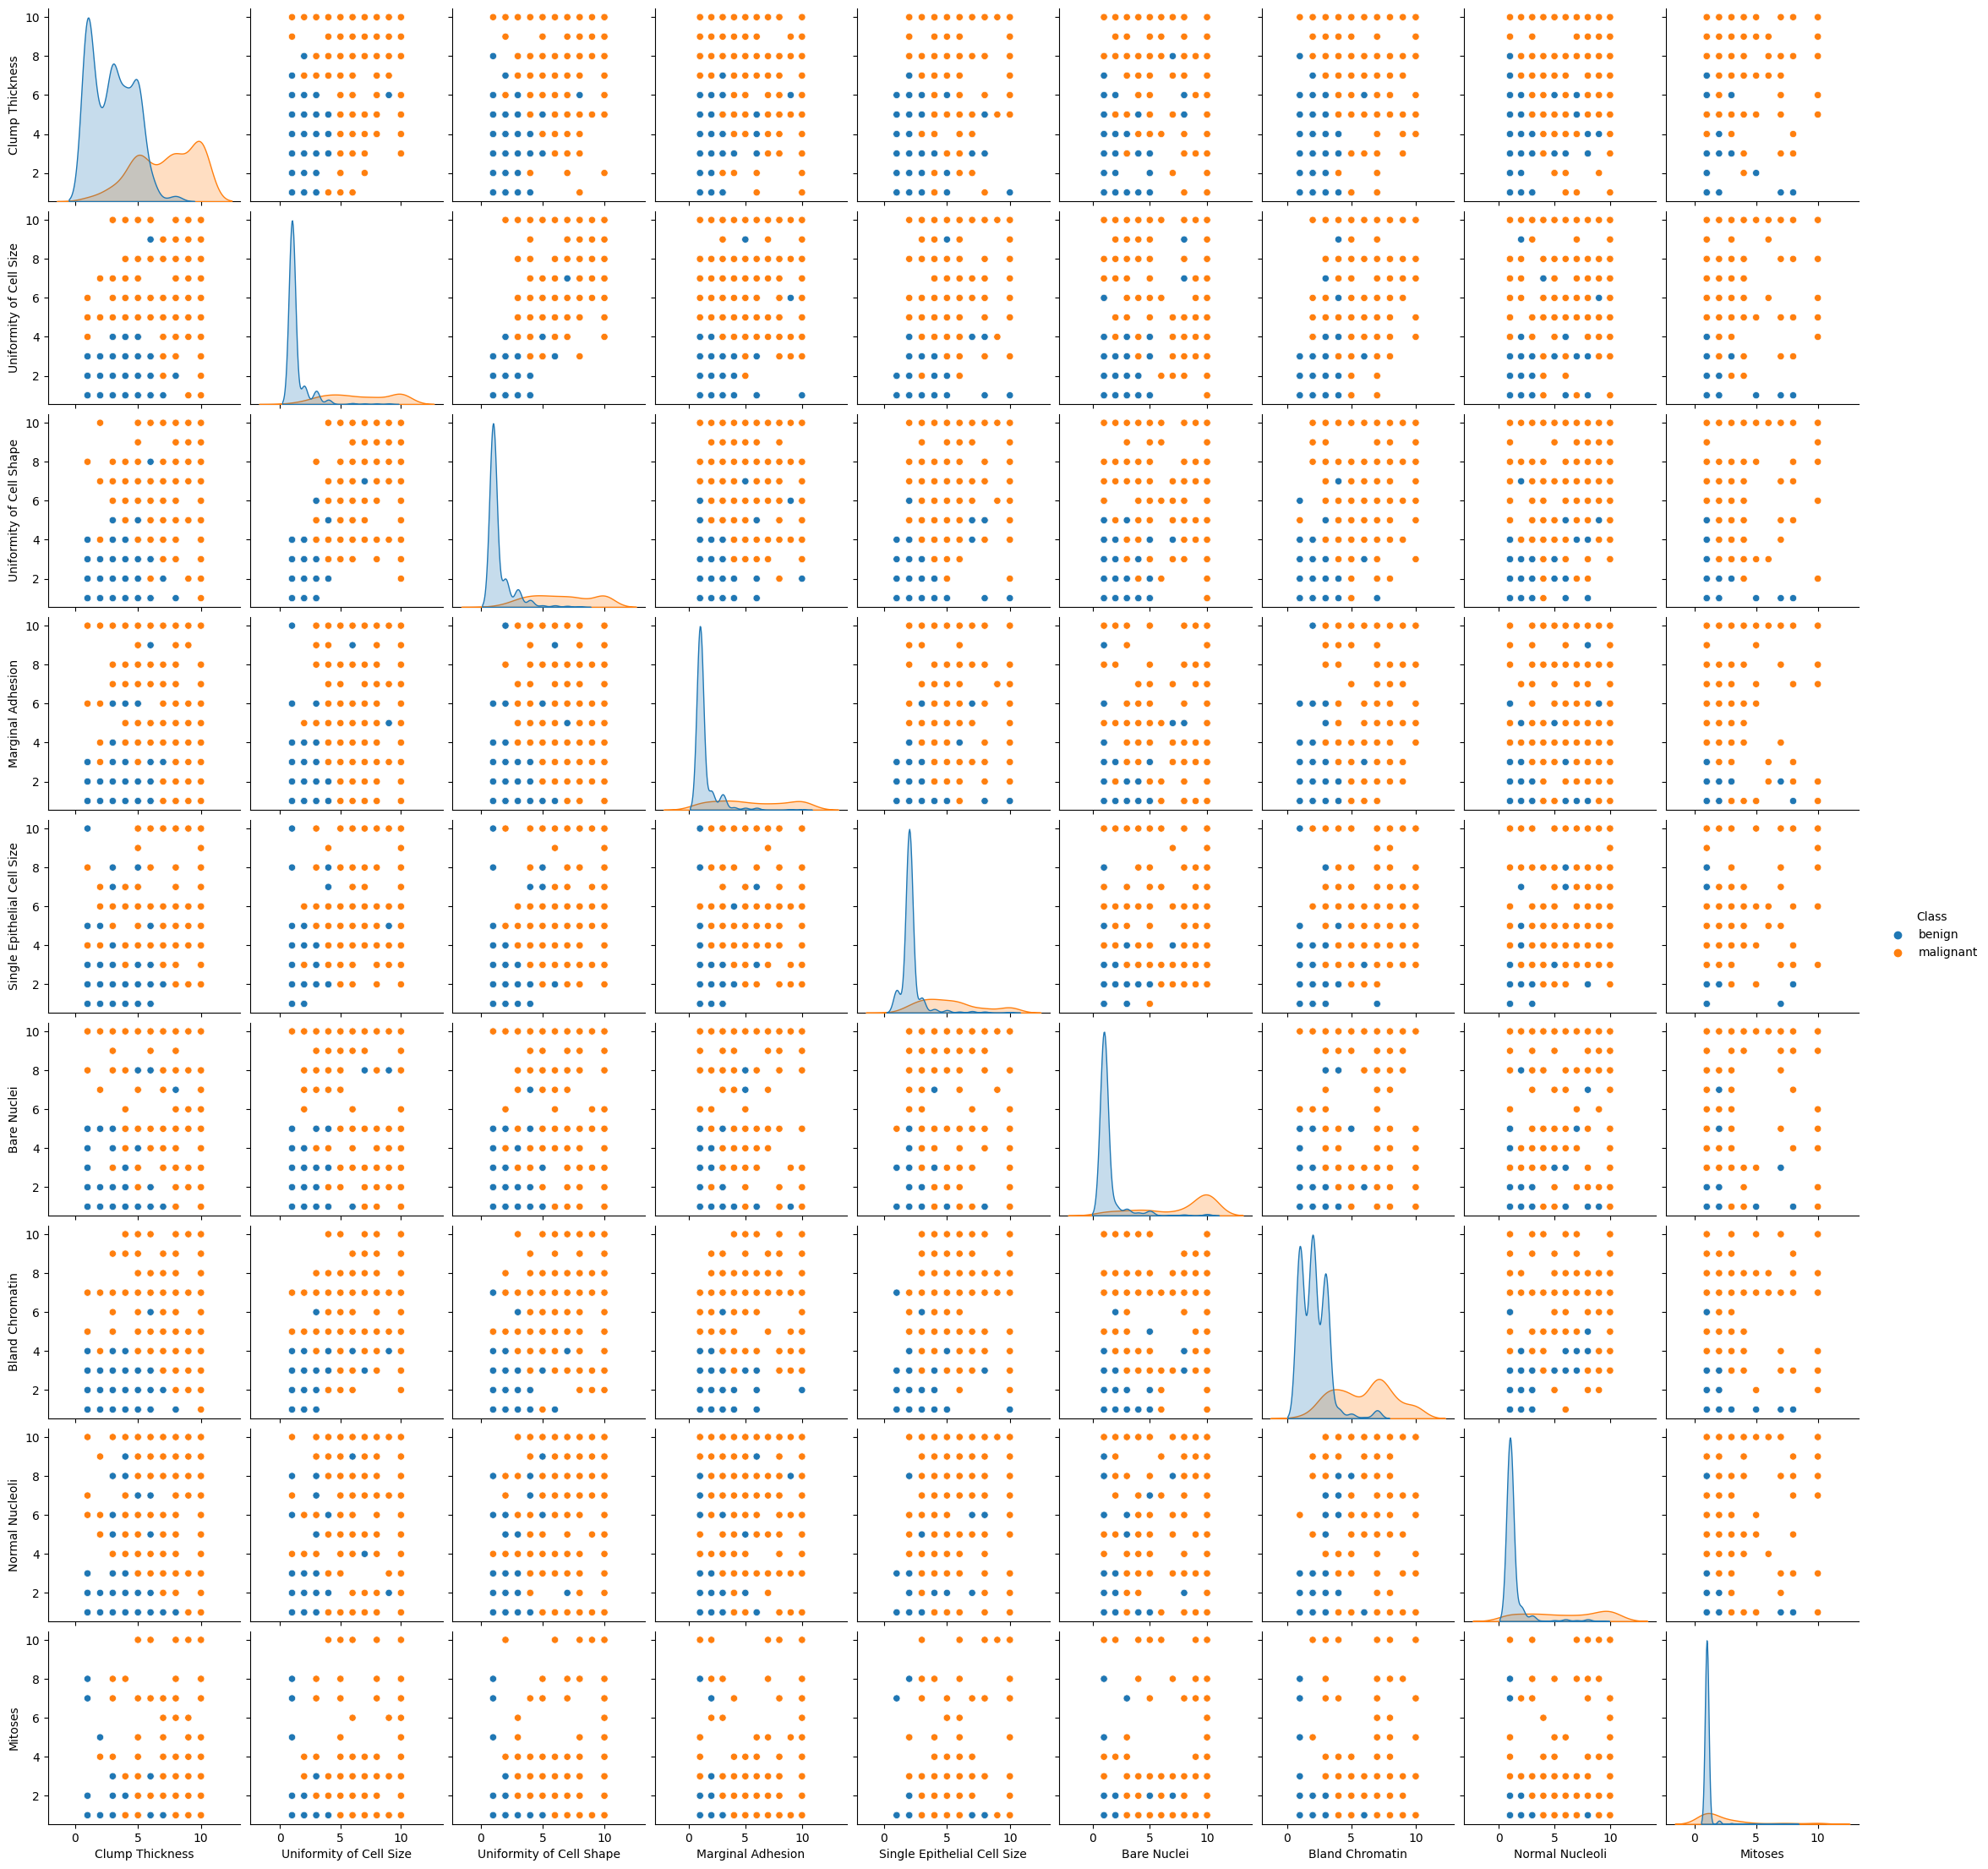

In [66]:
df = pd.read_csv("breast_cancer_upd.csv", usecols=["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size",
                                                   "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"])

warnings.filterwarnings("ignore")

# Create the pair plot
sns.pairplot(df, hue="Class")
plt.show()

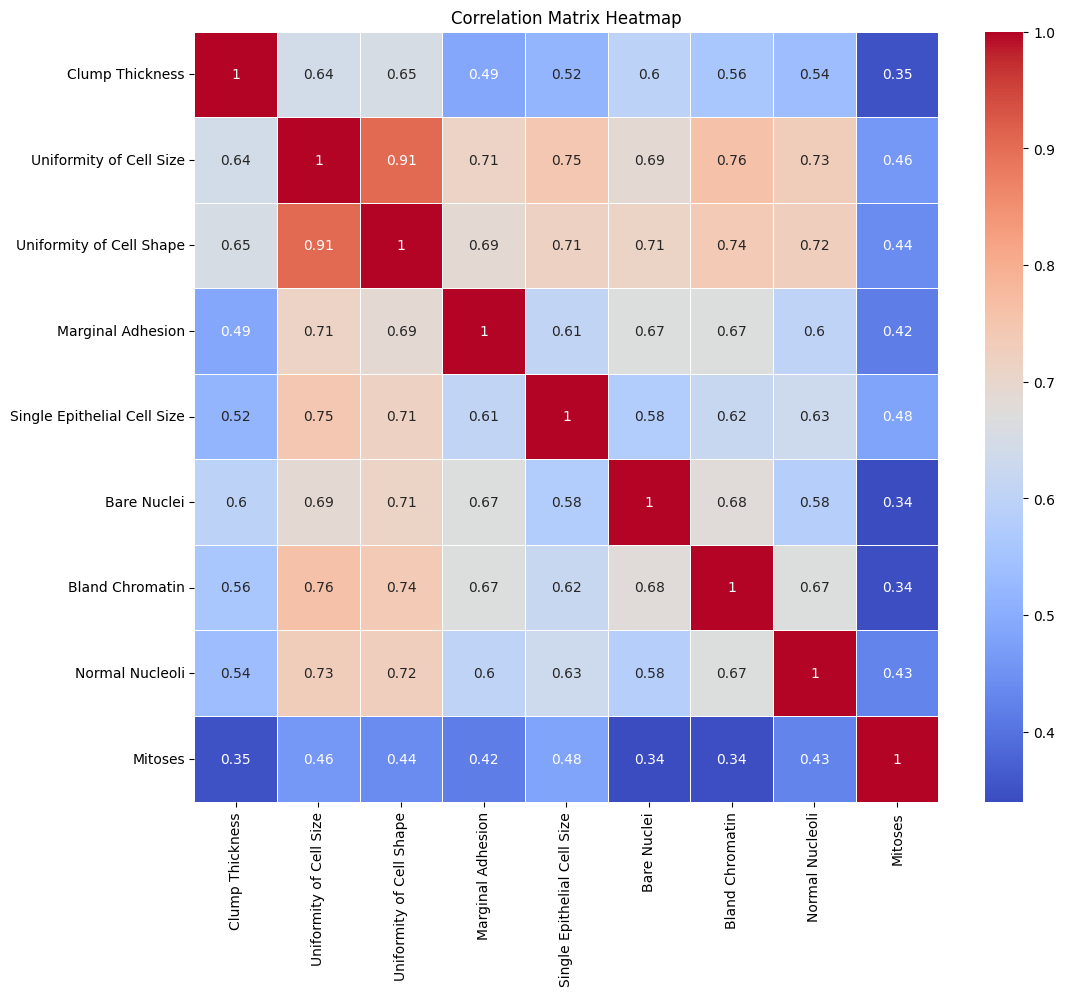

In [67]:
df = pd.read_csv("breast_cancer_upd.csv", usecols=["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size",
                                                   "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses"])

corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

Linear regression

In [68]:
df = pd.read_csv("breast_cancer_upd.csv", usecols=["Class", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses"])

# "Class" is the name of the column we want to predict
X = df.drop("Class", axis=1)
y = df["Class"]

# Encode the target column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the shapes of the datasets
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Display the model's intercept and coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


(690, 9) (690,)
(552, 9) (552,)
(138, 9) (138,)
Intercept: -0.2590550861430997
Coefficients: [0.03419928 0.02356186 0.01610786 0.00410363 0.0120157  0.04638078
 0.01803204 0.01421465 0.005136  ]


Calculating coefficient of determination (R²) and Mean squared error/Root mean squared error (MSE/RMSE)

In [69]:
# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate the R-squared value and MSE value
r2 = r2_score(y_train, y_train_pred)
print("R-squared:", r2)
mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error:", mse)
rmse = root_mean_squared_error(y_train, y_train_pred)
print("Root Mean Squared Error:", rmse)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate the R-squared value and MSE value for the test set
r2_test = r2_score(y_test, y_test_pred)
print("R-squared (test set):", r2_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (test set):", mse_test)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
print("Root Mean Squared Error:", rmse_test)

R-squared: 0.8408847340029502
Mean Squared Error: 0.03626756935920468
Root Mean Squared Error: 0.19044046145502977
R-squared (test set): 0.8323460370854386
Mean Squared Error (test set): 0.03641129965420215
Root Mean Squared Error: 0.19081745112594434


Creating prediction on testing data sample - checking the predictive result on random data array

In [71]:
# Create prediction data with the same feature names
predict_data = pd.DataFrame([[1, 1, 1, 1, 5, 3, 3, 3, 2]], columns=X.columns)
# print("Predict data:", predict_data)

# Make a prediction
prediction = model.predict(predict_data)
print("Prediction:", prediction)

# Decode the prediction back to the original labels
decoded_prediction = label_encoder.inverse_transform(prediction.round().astype(int))
print("Decoded Prediction:", decoded_prediction)

Prediction: [0.12515047]
Decoded Prediction: ['benign']


Polynomial features

In [72]:
df = pd.read_csv("breast_cancer_upd.csv", usecols=["Class", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses"])

# "Class" is the name of the column we want to predict
X = df.drop("Class", axis=1)
y = df["Class"]

# Encode the target column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply polynomial features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree based on your needs
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and train the linear regression model with polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Display the model's intercept and coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -0.32292829773415455
Coefficients: [-1.00184448e-14 -2.00766444e-02  4.01436079e-02  4.52239344e-02
  2.85659907e-02 -1.00933581e-02  7.73152098e-02  3.41787556e-02
  2.28043746e-02  5.33368189e-02  6.85450616e-03 -1.67501546e-04
 -3.85936513e-04 -5.11244438e-03  2.10646794e-03 -6.05945532e-06
 -3.08466841e-03 -2.48238194e-03  2.78081051e-03  2.58671551e-03
 -2.67998769e-03  7.09299165e-03 -9.91245445e-04 -1.04595236e-02
  9.51666904e-04  1.35591912e-04 -7.47370434e-04 -2.00898211e-03
 -1.97904637e-03 -2.64125807e-03 -7.57241457e-04  5.36216823e-03
  7.03772102e-04  3.52918017e-04  9.34339910e-04 -1.81120372e-03
  1.71328068e-03 -5.80815956e-03  2.89371849e-04 -2.17989053e-03
  3.47835413e-03 -1.19905653e-03 -1.81496131e-05 -7.53708007e-04
  1.04868067e-03  6.77100264e-04  3.34297425e-03 -3.22907925e-04
 -2.11646147e-03 -1.23268563e-03 -3.08165690e-03  5.39743023e-04
  2.10064465e-03 -2.08073762e-03 -3.04657328e-03]


Calculating coefficient of determination (R²) and Mean squared error (MSE)

In [73]:
# Make predictions on the training set with polynomial features
y_train_pred = model.predict(X_train_poly)

# Calculate the R-squared value and MSE value for the training set
r2_train = r2_score(y_train, y_train_pred)
print("R-squared (training set):", r2_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (training set):", mse_train)

# Make predictions on the test set with polynomial features
y_test_pred = model.predict(X_test_poly)

# Calculate the R-squared value and MSE value for the test set
r2_test = r2_score(y_test, y_test_pred)
print("R-squared (test set):", r2_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (test set):", mse_test)

R-squared (training set): 0.8924300232322308
Mean Squared Error (training set): 0.02451871332990414
R-squared (test set): 0.8683530116515292
Mean Squared Error (test set): 0.028591259389270898


Creating prediction on testing data sample - checking the predictive result on random data array

In [74]:
# Create prediction data with polynomial features
predict_data = pd.DataFrame([[3, 4, 3, 2, 4, 3, 5, 1, 1]], columns=X.columns)
predict_data_poly = poly.transform(predict_data)
print("Predict data (polynomial):", predict_data_poly)

# Make a prediction with polynomial features
prediction = model.predict(predict_data_poly)
print("Prediction:", prediction)

# Decode the prediction back to the original labels
decoded_prediction = label_encoder.inverse_transform(prediction.round().astype(int))
print("Decoded Prediction:", decoded_prediction)

Predict data (polynomial): [[ 1.  3.  4.  3.  2.  4.  3.  5.  1.  1.  9. 12.  9.  6. 12.  9. 15.  3.
   3. 16. 12.  8. 16. 12. 20.  4.  4.  9.  6. 12.  9. 15.  3.  3.  4.  8.
   6. 10.  2.  2. 16. 12. 20.  4.  4.  9. 15.  3.  3. 25.  5.  5.  1.  1.
   1.]]
Prediction: [0.35264238]
Decoded Prediction: ['benign']


Decision tree - first attempt - overfitting

In [75]:
# Load the CSV file
df = pd.read_csv("breast_cancer_upd.csv", usecols=["Class", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses"])

# "Class" is the name of the column we want to predict
X = df.drop("Class", axis=1)
y = df["Class"]

# Encode the target column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate the R-squared value and MSE value for the training set
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
print("R-squared (training set):", r2_train)
print("Mean Squared Error (training set):", mse_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate the R-squared value and MSE value for the test set
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("R-squared (test set):", r2_test)
print("Mean Squared Error (test set):", mse_test)

(690, 9) (690,)
(552, 9) (552,)
(138, 9) (138,)
R-squared (training set): 1.0
Mean Squared Error (training set): 0.0
R-squared (test set): 0.6329787234042553
Mean Squared Error (test set): 0.07971014492753623


Hyperparameters tuning

In [76]:
# Define the model
model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("R-squared (test set):", r2_test)
print("Mean Squared Error (test set):", mse_test)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.9565601965601968
R-squared (test set): 0.7330754352030948
Mean Squared Error (test set): 0.057971014492753624


Decision tree now with adjusted hyperparameters and Lasso regularization

In [77]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use LassoCV for feature selection
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)
importance_lasso = np.abs(lasso.coef_)
selected_features = np.where(importance_lasso > 0)[0]

# Filter the selected features
X_selected = X.iloc[:, selected_features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Create and train the Decision Tree model with tuned hyperparameters
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=2, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate the R-squared value and MSE value for the training set
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
print("R-squared (training set):", r2_train)
print("Mean Squared Error (training set):", mse_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate the R-squared value and MSE value for the test set
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("R-squared (test set):", r2_test)
print("Mean Squared Error (test set):", mse_test)

(690, 9) (690,)
(552, 9) (552,)
(138, 9) (138,)
R-squared (training set): 0.8966768415596383
Mean Squared Error (training set): 0.02355072463768116
R-squared (test set): 0.7330754352030948
Mean Squared Error (test set): 0.057971014492753624


k-fold validation cross validation

In [79]:
# Define k-fold cross-validation with k=10
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=kf, scoring="accuracy")

# Print the cross-validation scores and their mean
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.98550725 0.91304348 0.94202899 0.94202899 0.97101449 0.94202899
 0.97101449 0.98550725 0.94202899 0.94202899]
Mean Cross-Validation Score: 0.9536231884057971


Leave-one-out cross validation

In [80]:
# Define Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=loo, scoring="accuracy")

# Print the cross-validation scores and their mean
# print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

Mean Cross-Validation Score: 0.946376811594203


Importance scores for features (variables)

In [81]:
# Get feature importance scores
importance = model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': df.drop("Class", axis=1).columns,
    'Importance': importance
})

# Sort the DataFrame by importance scores in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                       Feature  Importance
1      Uniformity of Cell Size    0.775767
5                  Bare Nuclei    0.133595
0              Clump Thickness    0.075806
3            Marginal Adhesion    0.005617
6              Bland Chromatin    0.005208
7              Normal Nucleoli    0.002819
4  Single Epithelial Cell Size    0.001189
2     Uniformity of Cell Shape    0.000000
8                      Mitoses    0.000000


MSE decomposing (Bias-Variance trade-off)

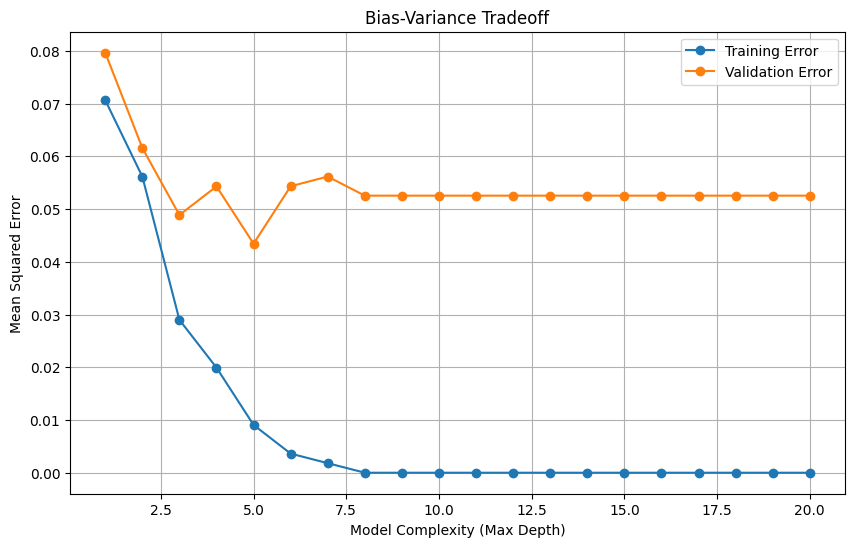

In [82]:
# Arrays to store the results
max_depths = range(1, 21)
train_errors = []
val_errors = []

# Evaluate the model for different max depths
for max_depth in max_depths:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Calculate training error
    train_pred = model.predict(X_train)
    train_error = np.mean((train_pred - y_train)**2)
    train_errors.append(train_error)

    # Calculate validation error using cross-validation
    val_error = -np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    val_errors.append(val_error)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_errors, label='Training Error', marker='o')
plt.plot(max_depths, val_errors, label='Validation Error', marker='o')
plt.xlabel('Model Complexity (Max Depth)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid(True)
plt.show()

Creating prediction on testing data sample - checking the predictive result on random data array

In [84]:
# Create prediction data with the same feature names
predict_data = pd.DataFrame([[3, 4, 2, 3, 3, 3, 2, 3, 2]], columns=X.columns[selected_features])
# print("Predict data:", predict_data)

# Make a prediction
prediction = model.predict(predict_data)
print("Prediction:", prediction)

# Decode the prediction back to the original labels
decoded_prediction = label_encoder.inverse_transform(prediction)
print("Decoded Prediction:", decoded_prediction)

Prediction: [0]
Decoded Prediction: ['benign']
